In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

Python's output file.

In [2]:
cost_py2 = np.load('Cr25Mn25Co25_4000_try1_pbc.npy')
cost_py3 = np.load('Cr25Mn25Co25_4000_try2_pbc.npy')
cost_py = np.concatenate([cost_py2, cost_py3], axis=0)

time_py, step_py = cost_py[:,0], cost_py[:,1]

In [4]:
np.mean(time_py)

171.3469767856598

Julia's output file

In [5]:
time_jl = np.load('Cr25Mn25Co25_try_jltime_pbc.npy')
step_jl = np.load('Cr25Mn25Co25_try_jlstep_pbc.npy')

In [6]:
np.mean(time_jl)

0.42924109917500003

KDE plots.

<Figure size 1080x576 with 0 Axes>

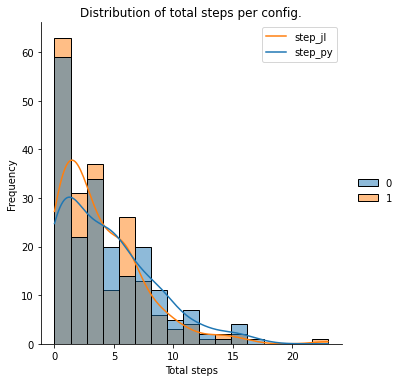

In [9]:
# v1 = np.random.normal(0,10,1000)
# v2 = np.random.normal(60,15,1000)
fig = plt.figure(figsize=(15, 8))

ax = sns.displot(data=[step_py, step_jl], kde=True,
    multiple="dodge", color=["blue", "red"],)

plt.xlabel("Total steps")
plt.ylabel("Frequency")

plt.legend(labels=["step_jl", "step_py"])
plt.title('Distribution of total steps per config.')
plt.show()

<Figure size 1080x576 with 0 Axes>

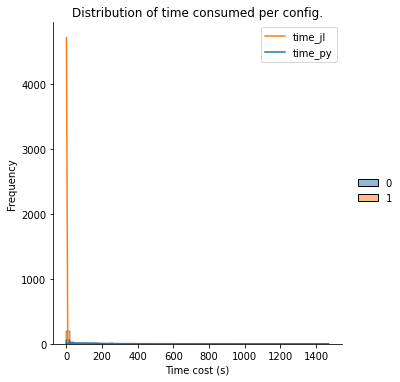

In [11]:
# v1 = np.random.normal(0,10,1000)
# v2 = np.random.normal(60,15,1000)

plt.figure(figsize=(15, 8))
sns.displot(data=[time_py, time_jl], kde=True,
    multiple="dodge", color=["blue", "red"],)

plt.xlabel("Time cost (s)")
plt.ylabel("Frequency")

plt.legend(labels=["time_jl", "time_py"])
plt.title('Distribution of time consumed per config.')
plt.show()

Index of pair cluster in **PBC** config. $R\in 192*27\times1$ 

In [57]:
from itertools import combinations, product
from sub_func import abs_dis

def draw_3d(ind_raw):
    ind_raw = np.array(ind_raw)
    plt.rcParams["figure.figsize"] = [5, 5]
    # plt.rcParams["figure.autolayout"] = True
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(ind_raw[:,0], ind_raw[:,1], ind_raw[:,2], alpha = 0.5, c = 'r')
    plt.show()
    return
    
ind_raw = np.load('fcc_192/ind_raw.npy')
ind_pbc = ind_raw.copy()
dis_list = []
for i, j in combinations(range(len(ind_raw)), 2):
    dis_list.append(round(abs_dis(ind_raw[i], ind_raw[j], 0), 4))

nn1, nn2, nn3, nn4, nn5, nn6 = np.unique(dis_list)[:6]
print(nn1, nn2, nn3, nn4, nn5, nn6)

%matplotlib widget
trans_mat = np.array([0,-1,1])
for i, j, k in product(trans_mat, repeat=3):
    trans_vector = np.array([i,j,k])*np.array([6,8,8])
    if np.linalg.norm(trans_vector) != 0:
        ind_pbc = np.concatenate([ind_pbc, ind_raw+trans_vector], axis=0)

np.save('/Volumes/ohyes/julia_transform/fcc_192/ind_pbc27.npy', ind_pbc)
print(ind_pbc.shape)

1.4142 2.0 2.4495 2.8284 3.1623 3.4641
(5184, 3)


In [60]:
ind_1nn_pbc, ind_2nn_pbc, ind_3nn_pbc, ind_4nn_pbc, ind_5nn_pbc, ind_6nn_pbc = (
    [],[],[],[],[],[]
)
count = 0
start_ = time.time()

for i, j in combinations(range(len(ind_pbc)), 2):
    a1, a2 = ind_pbc[i], ind_pbc[j]
    if abs_dis(a1, a2, nn1) < 0.001:
        ind_1nn_pbc.append([i, j])
    elif abs_dis(a1, a2, nn2) < 0.001:
        ind_2nn_pbc.append([i, j])
    elif abs_dis(a1, a2, nn3) < 0.001:
        ind_3nn_pbc.append([i, j])
    elif abs_dis(a1, a2, nn4) < 0.001:
        ind_4nn_pbc.append([i, j])
    elif abs_dis(a1, a2, nn5) < 0.001:
        ind_5nn_pbc.append([i, j])
    elif abs_dis(a1, a2, nn6) < 0.001:
        ind_6nn_pbc.append([i, j])
    
    count += 1
    if count % 1000000 == 0:
        print(count, time.time() - start_)
    
np.save('fcc_192/ind_1nn_pbc.npy', ind_1nn_pbc)
np.save('fcc_192/ind_2nn_pbc.npy', ind_2nn_pbc)
np.save('fcc_192/ind_3nn_pbc.npy', ind_3nn_pbc)
np.save('fcc_192/ind_4nn_pbc.npy', ind_4nn_pbc)
np.save('fcc_192/ind_5nn_pbc.npy', ind_5nn_pbc)
np.save('fcc_192/ind_6nn_pbc.npy', ind_6nn_pbc)

1000000 49.49421191215515
2000000 99.7625207901001
3000000 151.96739888191223
4000000 202.58425784111023
5000000 255.5578579902649
6000000 311.2265417575836
7000000 361.72507977485657
8000000 406.31299209594727
9000000 451.538635969162
10000000 500.766695022583
11000000 548.3633008003235
12000000 594.9624660015106
13000000 642.55797290802
